In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('dataset/data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

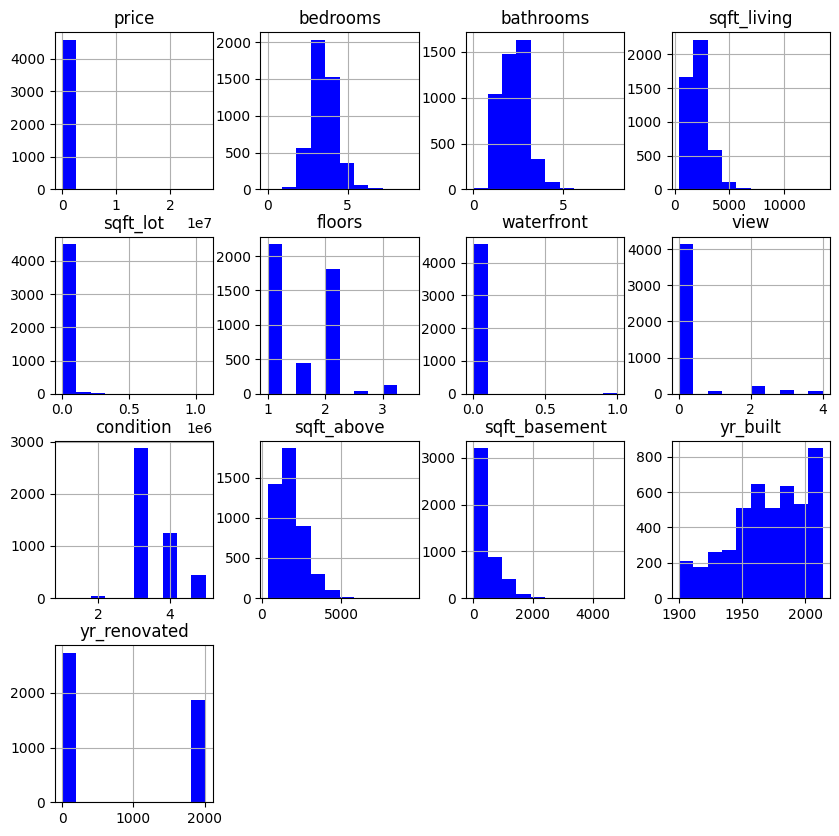

In [5]:
data.hist(figsize=(10,10), color='blue')

In [6]:
print(data['country'].unique())
print(data['city'].unique())

['USA']
['Shoreline' 'Seattle' 'Kent' 'Bellevue' 'Redmond' 'Maple Valley'
 'North Bend' 'Lake Forest Park' 'Sammamish' 'Auburn' 'Des Moines'
 'Bothell' 'Federal Way' 'Kirkland' 'Issaquah' 'Woodinville'
 'Normandy Park' 'Fall City' 'Renton' 'Carnation' 'Snoqualmie' 'Duvall'
 'Burien' 'Covington' 'Inglewood-Finn Hill' 'Kenmore' 'Newcastle'
 'Mercer Island' 'Black Diamond' 'Ravensdale' 'Clyde Hill' 'Algona'
 'Skykomish' 'Tukwila' 'Vashon' 'Yarrow Point' 'SeaTac' 'Medina'
 'Enumclaw' 'Snoqualmie Pass' 'Pacific' 'Beaux Arts Village' 'Preston'
 'Milton']


<Axes: xlabel='city', ylabel='price'>

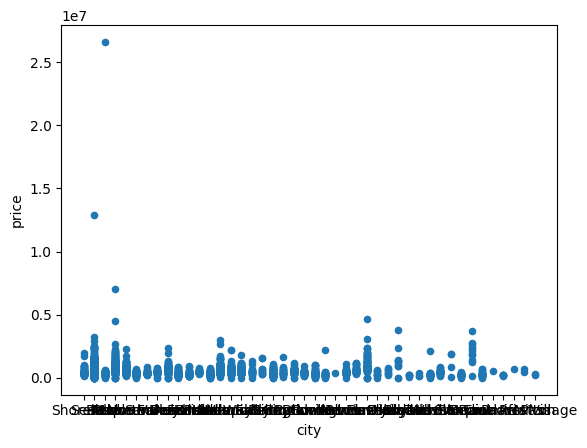

In [7]:
data.plot(kind='scatter', x='city', y='price')

In [8]:
data1 = data.drop(['date','street','city','statezip','country'], axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


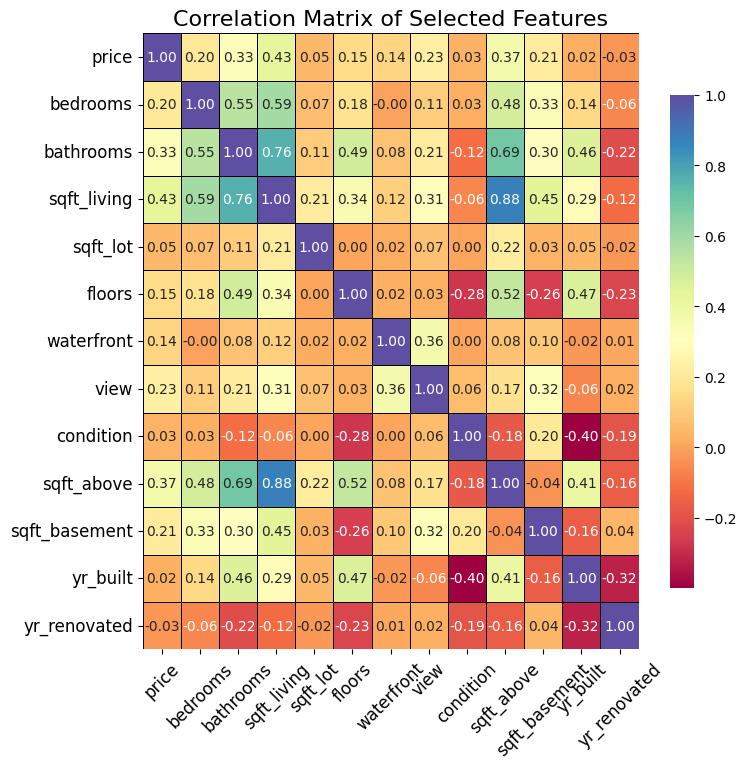

In [9]:
# Calculate the correlation matrix
corr_matrix = data1.corr(method="pearson")

# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Spectral', cbar_kws={'shrink': .8}, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Customize the plot
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix of Selected Features', fontsize=16)
plt.show()

In [10]:
# Get correlations higher than abs(0.1)
corr_columns=corr_matrix.index[abs(corr_matrix['price'])>=0.1].tolist()
corr_columns.remove('price')   
print(corr_columns)

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement']


In [11]:
data[corr_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4600 non-null   float64
 1   bathrooms      4600 non-null   float64
 2   sqft_living    4600 non-null   int64  
 3   floors         4600 non-null   float64
 4   waterfront     4600 non-null   int64  
 5   view           4600 non-null   int64  
 6   sqft_above     4600 non-null   int64  
 7   sqft_basement  4600 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 287.6 KB


In [12]:
y=data['price']
x=data[corr_columns]
scaler = StandardScaler() 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=43)
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [13]:
print(f'x_train size: {len(x_train)}')
print(f'x_test size: {len(x_test)}')
print(f'y_train size: {len(y_train)}')
print(f'y_test size: {len(y_test)}')

x_train size: 4140
x_test size: 460
y_train size: 4140
y_test size: 460


In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_acc = r2_score(y_test, lr_predict)
print(f'Linear Regression Accuracy: {lr_acc}')

Linear Regression Accuracy: 0.5086398804390571


In [15]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso_predict = lasso.predict(X_test)

lasso_acc = r2_score(y_test, lasso_predict)
print(f'Lasso Accuracy: {lasso_acc}')

Lasso Accuracy: 0.5107230839362087


In [16]:
print(lasso_acc > lr_acc)

True
